In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

# for machine learning algorithms
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_columns', 1500)
pd.set_option('max_rows', 1500000)
pd.set_option('max_colwidth', -1)
pd.options.display.float_format='{:.5f}'.format

In [3]:
import pymysql

db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     password="Mysql@987") # name of the data base  

In [4]:
cursor=db.cursor()

# Employee

In [5]:
cursor.execute("""SELECT e.*, sum(s.Sales_Price), count(s.Sales_ID) 
                    FROM ProductSales.Sales s, ProductSales.Employee e 
                    WHERE e.Employee_ID=s.Employee_ID 
                    GROUP BY e.Employee_ID 
                    ORDER BY sum(s.Sales_Price) DESC;""")

23

In [6]:
EmployeeDetails = cursor.fetchall()

In [7]:
EmployeeDetailsDF = pd.DataFrame(EmployeeDetails, columns=['Employee_ID','Employee_Name','Employee_Middle',
                                        'Employee_LastName','Total_Sales_Price','Total_Sales_Count'])
EmployeeDetailsDF

,Employee_ID,Employee_Name,Employee_Middle,Employee_LastName,Total_Sales_Price,Total_Sales_Count
0,21,DIRK,T,STRINGER,26035040293.29199,44734
1,1,ABRAHAM,E,BENNET,24312432393.84541,99055
2,17,ALBERT,I,RINGER,19976036093.48242,41613
3,4,MICHEL,E,DEFRANCE,17311426361.05273,44183
4,13,STEARNS,A,MACFEATHER,16963967570.09265,40423
5,14,HEATHER,C,MCBADDEN,15565914224.12891,43859
6,7,MARJORIE,R,GREEN,13940868513.88184,54951
7,20,DEAN,T,STRAIGHT,12908238400.55225,50896
8,5,INNES,E,DEL CASTILLO,12646855319.55664,41996
9,8,MORNINGSTAR,R,GREENE,12337755290.25781,46683


In [8]:
bins = [0, 10000000000, 20000000000, 30000000000]
labels = ['1% BONUS','2% BONUS','3% BONUS']
EmployeeDetailsDF['Bonus_Category'] = pd.cut(EmployeeDetailsDF['Total_Sales_Price'], bins=bins, 
                                       labels=labels, right=True, include_lowest=True)
EmployeeDetailsDF

,Employee_ID,Employee_Name,Employee_Middle,Employee_LastName,Total_Sales_Price,Total_Sales_Count,Bonus_Category
0,21,DIRK,T,STRINGER,26035040293.29199,44734,3% BONUS
1,1,ABRAHAM,E,BENNET,24312432393.84541,99055,3% BONUS
2,17,ALBERT,I,RINGER,19976036093.48242,41613,2% BONUS
3,4,MICHEL,E,DEFRANCE,17311426361.05273,44183,2% BONUS
4,13,STEARNS,A,MACFEATHER,16963967570.09265,40423,2% BONUS
5,14,HEATHER,C,MCBADDEN,15565914224.12891,43859,2% BONUS
6,7,MARJORIE,R,GREEN,13940868513.88184,54951,2% BONUS
7,20,DEAN,T,STRAIGHT,12908238400.55225,50896,2% BONUS
8,5,INNES,E,DEL CASTILLO,12646855319.55664,41996,2% BONUS
9,8,MORNINGSTAR,R,GREENE,12337755290.25781,46683,2% BONUS


In [9]:
Xemp=EmployeeDetailsDF[['Total_Sales_Price','Total_Sales_Count']]
Xemp

,Total_Sales_Price,Total_Sales_Count
0,26035040293.29199,44734
1,24312432393.84541,99055
2,19976036093.48242,41613
3,17311426361.05273,44183
4,16963967570.09265,40423
5,15565914224.12891,43859
6,13940868513.88184,54951
7,12908238400.55225,50896
8,12646855319.55664,41996
9,12337755290.25781,46683


In [10]:
XempArray = Xemp.as_matrix()
XempArray

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[2.60350403e+10, 4.47340000e+04],
       [2.43124324e+10, 9.90550000e+04],
       [1.99760361e+10, 4.16130000e+04],
       [1.73114264e+10, 4.41830000e+04],
       [1.69639676e+10, 4.04230000e+04],
       [1.55659142e+10, 4.38590000e+04],
       [1.39408685e+10, 5.49510000e+04],
       [1.29082384e+10, 5.08960000e+04],
       [1.26468553e+10, 4.19960000e+04],
       [1.23377553e+10, 4.66830000e+04],
       [1.14320536e+10, 4.94270000e+04],
       [1.06379427e+10, 5.08590000e+04],
       [1.06128805e+10, 5.14140000e+04],
       [9.74926697e+09, 3.24170000e+04],
       [9.74080744e+09, 4.83850000e+04],
       [8.44425936e+09, 4.37180000e+04],
       [8.11146054e+09, 4.70610000e+04],
       [8.09273548e+09, 4.65380000e+04],
       [6.95039133e+09, 2.87840000e+04],
       [6.87043080e+09, 4.25670000e+04],
       [6.20956381e+09, 3.49260000e+04],
       [4.65401883e+09, 4.53390000e+04],
       [2.46806518e+09, 1.87150000e+04]])

# Kmeans Clustering on Employee Details

In [11]:
kmeans_model_emp = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
emp_km = kmeans_model_emp.fit_predict(XempArray)

In [12]:
emp_km

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [13]:
metrics.silhouette_score(Xemp, emp_km, metric='euclidean')

0.5039062054773752

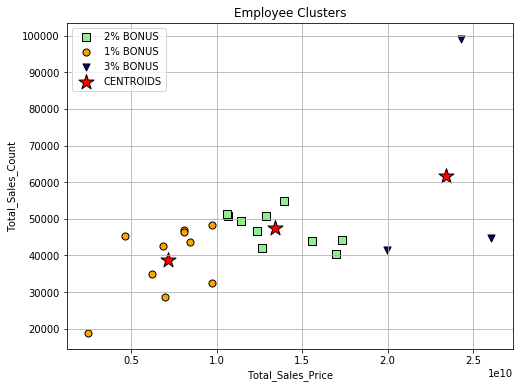

In [14]:
# plot the 3 clusters for employee
plt.figure(figsize=(8,6))
plt.scatter(
    XempArray[emp_km == 0, 0], XempArray[emp_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='2% BONUS'
)

plt.scatter(
    XempArray[emp_km == 1, 0], XempArray[emp_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='1% BONUS'
)

plt.scatter(
    XempArray[emp_km == 2, 0], XempArray[emp_km == 2, 1],
    s=50, c='darkblue',
    marker='v', edgecolor='black',
    label='3% BONUS'
)

# plot the centroids
plt.scatter(
    kmeans_model_emp.cluster_centers_[:, 0], kmeans_model_emp.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='CENTROIDS'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.title('Employee Clusters')
plt.xlabel('Total_Sales_Price')
plt.ylabel('Total_Sales_Count')
plt.show()

# Random Forest Classification on Employee Details

In [15]:
#Slicing of data to devide it into target and feature set
X=EmployeeDetailsDF[['Total_Sales_Price','Total_Sales_Count']]
y=EmployeeDetailsDF[['Bonus_Category']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [17]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=100)
model_tree.fit(X_train, y_train)

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [18]:
y_pred_rf = model_tree.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred_rf))

[[3 0]
 [0 2]]


In [20]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_rf)*100))

Accuracy is 100.0


In [21]:
model_tree.predict([[431243239.29199,4951]]) 

array(['1% BONUS'], dtype=object)

In [22]:
del X_train, X_test, y_train, y_test, y_pred_rf

# XGBoost Classification on Employee Details

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [24]:
model = XGBClassifier(learning_rate = 0.05, n_estimators = 300, max_depth = 5)

In [25]:
model.fit(X_train, y_train)

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
y_pred_xg = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred_xg))

[[3 0]
 [0 2]]


In [28]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_xg)*100))

Accuracy is 100.0


In [29]:
data = {'Total_Sales_Price': [431243239.29199], 'Total_Sales_Count': [4951]}
new_df = pd.DataFrame(data=data)
new_df

,Total_Sales_Price,Total_Sales_Count
0,431243239.29199,4951


In [30]:
model.predict(new_df)

array(['1% BONUS'], dtype=object)

In [31]:
del X_train, X_test, y_train, y_test, y_pred_xg

# Customer

In [32]:
cursor.execute("""SELECT c.*, sum(s.Sales_Price), count(s.Sales_ID)
                    FROM ProductSales.Sales s, ProductSales.Customer c
                    WHERE c.Customer_ID=s.Customer_ID
                    GROUP BY c.Customer_ID
                    ORDER BY sum(s.Sales_Price) DESC;""")

513

In [33]:
CustomerDetails = cursor.fetchall()

In [34]:
CustomerDetailsDF = pd.DataFrame(CustomerDetails, columns=['Customer_ID','Customer_Name','Customer_Middle',
                                        'Customer_LastName','Total_Sales_Price','Total_Sales_Count'])
CustomerDetailsDF

,Customer_ID,Customer_Name,Customer_Middle,Customer_LastName,Total_Sales_Price,Total_Sales_Count
0,14954,NATHANIEL,C,HOWARD,17068222121.00000,6436
1,4800,DALTON,M,COLEMAN,14170034878.00000,5337
2,9777,JILL,None,GOMEZ,9286694136.25000,5554
3,19280,WALTER,S,NAVARRO,8419085549.73999,5031
4,3026,CALEB,None,PATTERSON,7163042208.62500,6439
5,13981,MELANIE,B,RUSSELL,6030027053.43750,6381
6,18569,THOMAS,None,MARTINEZ,5831309921.87500,6425
7,12640,LORI,C,ALVAREZ,5796783153.37500,5204
8,11339,KATRINA,M,SHARMA,5420305687.50000,5548
9,14800,NATALIE,A,SANDERS,5392887475.25000,2029


In [35]:
bins = [0, 100000000, 2000000000, 30000000000]
labels = ['LOW','MID','HIGH']
CustomerDetailsDF['Customer_Value'] = pd.cut(CustomerDetailsDF['Total_Sales_Price'], bins=bins, 
                                       labels=labels, right=True, include_lowest=True)
CustomerDetailsDF

,Customer_ID,Customer_Name,Customer_Middle,Customer_LastName,Total_Sales_Price,Total_Sales_Count,Customer_Value
0,14954,NATHANIEL,C,HOWARD,17068222121.00000,6436,HIGH
1,4800,DALTON,M,COLEMAN,14170034878.00000,5337,HIGH
2,9777,JILL,None,GOMEZ,9286694136.25000,5554,HIGH
3,19280,WALTER,S,NAVARRO,8419085549.73999,5031,HIGH
4,3026,CALEB,None,PATTERSON,7163042208.62500,6439,HIGH
5,13981,MELANIE,B,RUSSELL,6030027053.43750,6381,HIGH
6,18569,THOMAS,None,MARTINEZ,5831309921.87500,6425,HIGH
7,12640,LORI,C,ALVAREZ,5796783153.37500,5204,HIGH
8,11339,KATRINA,M,SHARMA,5420305687.50000,5548,HIGH
9,14800,NATALIE,A,SANDERS,5392887475.25000,2029,HIGH


In [36]:
Xcus=CustomerDetailsDF[['Total_Sales_Price','Total_Sales_Count']]
Xcus

,Total_Sales_Price,Total_Sales_Count
0,17068222121.00000,6436
1,14170034878.00000,5337
2,9286694136.25000,5554
3,8419085549.73999,5031
4,7163042208.62500,6439
5,6030027053.43750,6381
6,5831309921.87500,6425
7,5796783153.37500,5204
8,5420305687.50000,5548
9,5392887475.25000,2029


In [37]:
XcusArray = Xcus.as_matrix()
XcusArray

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.70682221e+10, 6.43600000e+03],
       [1.41700349e+10, 5.33700000e+03],
       [9.28669414e+09, 5.55400000e+03],
       ...,
       [0.00000000e+00, 3.72000000e+02],
       [0.00000000e+00, 5.65700000e+03],
       [0.00000000e+00, 5.61600000e+03]])

# Kmeans Clustering on Customer Details

In [38]:
kmeans_model_cus = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
cus_km = kmeans_model_cus.fit_predict(XcusArray)

In [39]:
cus_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
metrics.silhouette_score(Xcus, cus_km, metric='euclidean')

0.8258176145494827

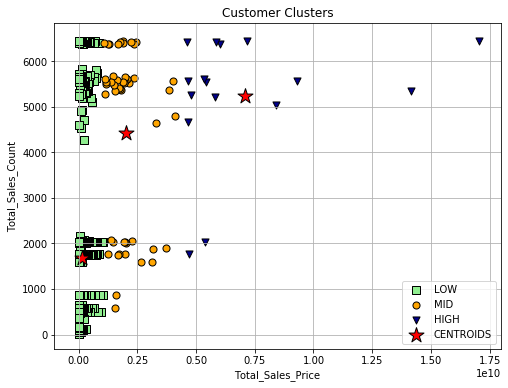

In [41]:
# plot the 3 clusters for customer
plt.figure(figsize=(8,6))
plt.scatter(
    XcusArray[cus_km == 0, 0], XcusArray[cus_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='LOW'
)

plt.scatter(
    XcusArray[cus_km == 1, 0], XcusArray[cus_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='MID'
)

plt.scatter(
    XcusArray[cus_km == 2, 0], XcusArray[cus_km == 2, 1],
    s=50, c='darkblue',
    marker='v', edgecolor='black',
    label='HIGH'
)


# plot the centroids
plt.scatter(
    kmeans_model_cus.cluster_centers_[:, 0], kmeans_model_cus.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='CENTROIDS'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.title('Customer Clusters')
plt.xlabel('Total_Sales_Price')
plt.ylabel('Total_Sales_Count')
plt.show()

# Random Forest Classification on Customer Details

In [42]:
#Slicing of data to devide it into target and feature set
X=CustomerDetailsDF[['Total_Sales_Price','Total_Sales_Count']]
y=CustomerDetailsDF[['Customer_Value']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [44]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=100)
model_tree.fit(X_train, y_train)

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [45]:
y_pred_rf = model_tree.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred_rf))

[[ 8  0  1]
 [ 0 56  1]
 [ 0  0 37]]


In [47]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_rf)*100))

Accuracy is 98.05825242718447


In [48]:
model_tree.predict([[1706822.00000,10000]])

array(['LOW'], dtype=object)

In [49]:
del X_train, X_test, y_train, y_test, y_pred_rf

# XGBoost Classification on Customer Details

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [51]:
model = XGBClassifier(learning_rate = 0.05, n_estimators = 300, max_depth = 5)

In [52]:
model.fit(X_train, y_train)

/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shekharsingh/anaconda3/envs/DataManagement/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
y_pred_xg = model.predict(X_test)

In [54]:
print(confusion_matrix(y_test, y_pred_xg))

[[ 8  0  1]
 [ 0 57  0]
 [ 0  0 37]]


In [55]:
print ("Accuracy is {}".format(accuracy_score(y_test,y_pred_xg)*100))

Accuracy is 99.02912621359224


In [56]:
data = {'Total_Sales_Price': [1706822.00000], 'Total_Sales_Count': [10000]}
new_df = pd.DataFrame(data=data)
new_df

,Total_Sales_Price,Total_Sales_Count
0,1706822.00000,10000


In [57]:
model.predict(new_df)

array(['LOW'], dtype=object)

In [58]:
del X_train, X_test, y_train, y_test, y_pred_xg

# Sales

In [59]:
cursor.execute("""SELECT s.*, p.Product_Price
                    FROM ProductSales.Sales s, ProductSales.Product p
                    WHERE p.Product_ID=s.Product_ID;""")

1048539

In [60]:
SalesDetails = cursor.fetchall()

In [61]:
SalesDetailsDF = pd.DataFrame(SalesDetails, columns=['Sales_ID','Sales_Price','Employee_ID',
                                        'Customer_ID','Product_ID','Quantity', 'Product_Price'])
SalesDetailsDF.head(100)

,Sales_ID,Sales_Price,Employee_ID,Customer_ID,Product_ID,Quantity,Product_Price
0,1,50620.00000,17,10482,500,500,101.24000
1,2,907597.00000,5,1964,306,810,1120.49000
2,3,21844.80000,8,12300,123,123,177.60000
3,4,10920.60000,1,4182,437,437,24.99000
4,5,1023380.00000,14,15723,246,750,1364.50000
5,6,9144.00000,14,6000,60,60,152.40000
6,7,26106.30000,5,17541,373,373,69.99000
7,8,210222.00000,20,9423,183,687,306.00000
8,9,16.00000,1,1,1,10,1.60000
9,10,10602.00000,11,11241,310,310,34.20000


# Correlation between Sales Details

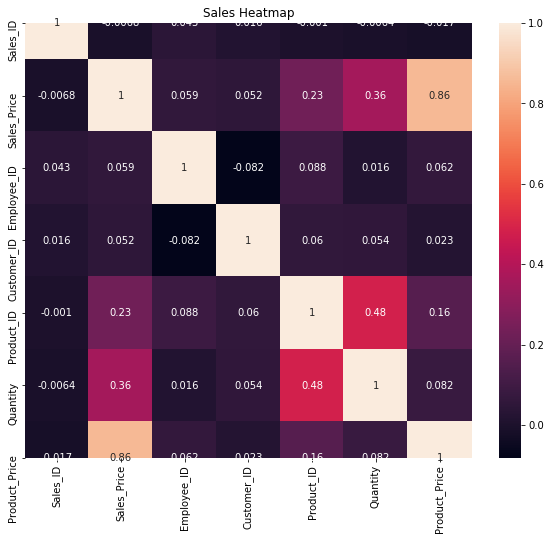

In [62]:
plt.figure(figsize=(10,8))
corr=SalesDetailsDF.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Sales Heatmap')
plt.show()

# END